In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## Titanic

In [2]:
# load the Titanic Dataset with a few variables  

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

survived      age      fare
0         1  29.0000  211.3375
1         1   0.9167  151.5500
2         0   2.0000  151.5500
3         0  30.0000  151.5500
4         0  25.0000  151.5500

In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

The only variable with missing data is Age, with ~20% of missing observations.

## Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [5]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [6]:
def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [7]:
# calculate the median Age

median = X_train.age.median()
median

28.0

In [8]:
# calculate the mean Age

mean = X_train.age.mean()
mean

30.23144399460189

In [9]:
# create a new variable with the missing values replaced
# using the function we created above

# first replace with the median
X_train['Age_median'] = impute_na(X_train, 'age', median)

# now replace with the mean
X_train['Age_mean'] = impute_na(X_train, 'age', mean)

# the mean contains many decimals, so I round to 1
# using the round function from numpy
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)

X_train.head(15)

age      fare  Age_median  Age_mean
501   13.0   19.5000        13.0      13.0
588    4.0   23.0000         4.0       4.0
402   30.0   13.8583        30.0      30.0
1193   NaN    7.7250        28.0      30.2
686   22.0    7.7250        22.0      22.0
971    NaN    7.8792        28.0      30.2
117   30.0   56.9292        30.0      30.0
540    2.0   26.0000         2.0       2.0
294   49.0  110.8833        49.0      49.0
261   35.0   26.2875        35.0      35.0
587    2.0   23.0000         2.0       2.0
489   42.0   26.0000        42.0      42.0
2      2.0  151.5500         2.0       2.0
405   18.0   13.0000        18.0      18.0
1284   NaN    8.0500        28.0      30.2

Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 28 (median) or 30 (mean).

In [10]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in Age, ~20%

print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  194.16304666581854
Variance after median imputation:  157.7984295760209
Variance after mean imputation:  157.02170735199397


As expected, the variance is underestimated, because now many values are the same ==> either the mean or the median value.

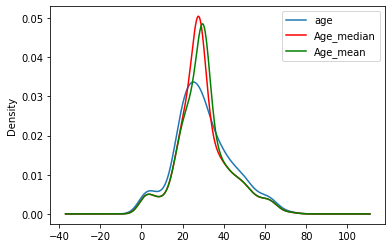

In [11]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

### Is this important?

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Mean / median imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

In [12]:
# The mean / median imputation may affect the relationship 
# with the other variables in the dataset 

X_train[['fare', 'age', 'Age_median', 'Age_mean']].cov()

fare         age  Age_median    Age_mean
fare        2248.326729  136.176223  114.961682  110.198311
age          136.176223  194.163047  194.163047  194.159033
Age_median   114.961682  194.163047  157.798430  157.035694
Age_mean     110.198311  194.159033  157.035694  157.021707

<AxesSubplot:>

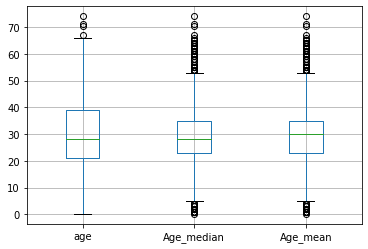

In [13]:
# The mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers

# Let's find out using a boxplot
X_train[['age', 'Age_median', 'Age_mean']].boxplot()

## House Prices Dataset

In [14]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [15]:
data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


LotFrontage  OverallQual  MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         65.0            7       196.0        150          856       856   
1         80.0            6         0.0        284         1262      1262   
2         68.0            7       162.0        434          920       920   
3         60.0            7         0.0        540          756       961   
4         84.0            8       350.0        490         1145      1145   

   GrLivArea  GarageYrBlt  WoodDeckSF  SalePrice  
0       1710       2003.0           0     208500  
1       1262       1976.0         298     181500  
2       1786       2001.0           0     223500  
3       1717       1998.0           0     140000  
4       2198       2000.0         192     250000

In [16]:
[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [18]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

In [19]:
# create a new variable with the missing values replaced
# by the median using the function we created above

# I repeat the following lines for each of the variables with NA
# over the next cells

median = X_train['LotFrontage'].median()

X_train.loc[:,'LotFrontage_median'] = impute_na(X_train, 'LotFrontage', median)
X_test.loc[:,'LotFrontage_median'] = impute_na(X_test, 'LotFrontage', median)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [20]:
median = X_train['MasVnrArea'].median()

X_train.loc[:,'MasVnrArea_median'] = impute_na(X_train, 'MasVnrArea', median)
X_test.loc[:,'MasVnrArea_median'] = impute_na(X_test, 'MasVnrArea', median)

In [21]:
median = X_train['GarageYrBlt'].median()

X_train.loc[:, 'GarageYrBlt_median'] = impute_na(X_train, 'GarageYrBlt', median)
X_test.loc[:,'GarageYrBlt_median'] = impute_na(X_test, 'GarageYrBlt', median)

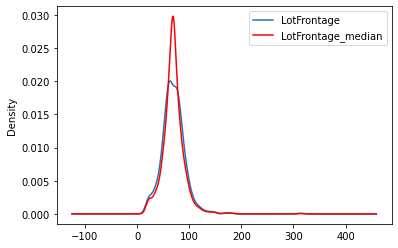

In [22]:
# let's evaluate the effect of median imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

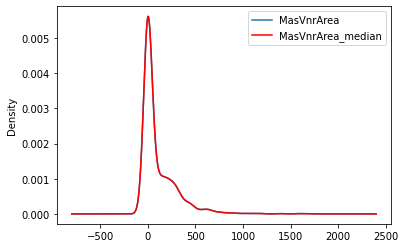

In [23]:
# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# original distribution of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

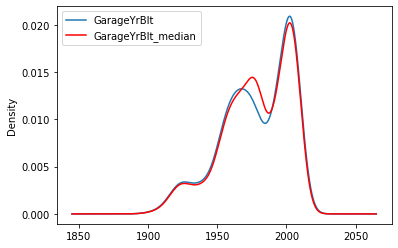

In [24]:
# similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a massive change in the
# original distribution of the variable, however we see more values
# at around the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['GarageYrBlt_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885676
Variance after median imputation:  434.06604265416564


In [26]:
# this is not the case for MasnVnrArea, because the % of missing data was small
print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.538710039466
Variance after median imputation:  32874.27007404175


In [27]:
# for GarageBlt, the % of missing data was small so the effect
# on the variance will also be small

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074134
Variance after median imputation:  591.3356883144767


In [28]:
# see how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables

X_train.cov()

LotFrontage   OverallQual    MasVnrArea     BsmtUnfSF  \
LotFrontage            532.587202      6.587119  6.805603e+02  9.496573e+02   
OverallQual              6.587119      1.843859  1.014970e+02  1.746147e+02   
MasVnrArea             680.560330    101.496976  3.298354e+04  7.540788e+03   
BsmtUnfSF              949.657293    174.614725  7.540788e+03  1.875241e+05   
TotalBsmtSF           2908.855504    288.624075  2.478877e+04  7.513307e+04   
1stFlrSF              3379.793504    224.297266  2.086595e+04  4.987449e+04   
GrLivArea             3919.951834    409.124216  3.520785e+04  5.203392e+04   
GarageYrBlt             30.611717     17.902809  1.203584e+03  1.823065e+03   
WoodDeckSF             134.741376     31.685571  3.208924e+03 -1.833201e+03   
SalePrice           668964.454191  83201.317781  6.836439e+06  6.833028e+06   
LotFrontage_median     532.587202      5.384774  5.539213e+02  7.880954e+02   
MasVnrArea_median      674.423263    100.533003  3.298354e+04  7.472110e+03   
GarageYrBlt_median      28.095264     16.875386  1.134381e+03  1.724142e+03   

                     TotalBsmtSF      1stFlrSF     GrLivArea    GarageYrBlt  \
LotFrontage         2.908856e+03  3.379794e+03  3.919952e+03      30.611717   
OverallQual         2.886241e+02  2.242973e+02  4.091242e+02      17.902809   
MasVnrArea          2.478877e+04  2.086595e+04  3.520785e+04    1203.583792   
BsmtUnfSF           7.513307e+04  4.987449e+04  5.203392e+04    1823.065167   
TotalBsmtSF         1.682931e+05  1.212079e+05  8.615192e+04    3173.042442   
1stFlrSF            1.212079e+05  1.398656e+05  1.044401e+05    2009.195552   
GrLivArea           8.615192e+04  1.044401e+05  2.681277e+05    2738.982988   
GarageYrBlt         3.173042e+03  2.009196e+03  2.738983e+03     624.305948   
WoodDeckSF          1.227966e+04  1.109406e+04  1.558395e+04     665.891118   
SalePrice           2.003928e+07  1.783631e+07  2.934477e+07  930935.489321   
LotFrontage_median  2.370929e+03  2.750747e+03  3.189686e+03      24.755173   
MasVnrArea_median   2.465436e+04  2.080136e+04  3.496714e+04    1182.673336   
GarageYrBlt_median  2.989473e+03  1.890272e+03  2.576346e+03     624.305948   

                      WoodDeckSF     SalePrice  LotFrontage_median  \
LotFrontage         1.347414e+02  6.689645e+05          532.587202   
OverallQual         3.168557e+01  8.320132e+04            5.384774   
MasVnrArea          3.208924e+03  6.836439e+06          553.921303   
BsmtUnfSF          -1.833201e+03  6.833028e+06          788.095358   
TotalBsmtSF         1.227966e+04  2.003928e+07         2370.929189   
1stFlrSF            1.109406e+04  1.783631e+07         2750.747094   
GrLivArea           1.558395e+04  2.934477e+07         3189.685753   
GarageYrBlt         6.658911e+02  9.309355e+05           24.755173   
WoodDeckSF          1.648582e+04  3.029981e+06          106.009105   
SalePrice           3.029981e+06  6.105731e+09       544838.836893   
LotFrontage_median  1.060091e+02  5.448388e+05          434.066043   
MasVnrArea_median   3.212101e+03  6.790442e+06          548.848031   
GarageYrBlt_median  6.276246e+02  8.774854e+05           22.883476   

                    MasVnrArea_median  GarageYrBlt_median  
LotFrontage              6.744233e+02           28.095264  
OverallQual              1.005330e+02           16.875386  
MasVnrArea               3.298354e+04         1134.380889  
BsmtUnfSF                7.472110e+03         1724.141544  
TotalBsmtSF              2.465436e+04         2989.473391  
1stFlrSF                 2.080136e+04         1890.271636  
GrLivArea                3.496714e+04         2576.345636  
GarageYrBlt              1.182673e+03          624.305948  
WoodDeckSF               3.212101e+03          627.624634  
SalePrice                6.790442e+06       877485.418108  
LotFrontage_median       5.488480e+02           22.883476  
MasVnrArea_median        3.287427e+04         1115.571890  
GarageYrBlt_median       1.115572e+03          

<AxesSubplot:>

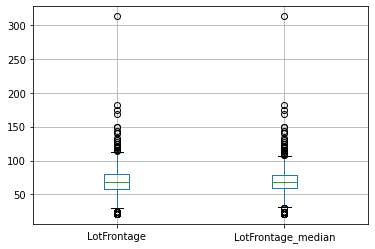

In [29]:
# Finally, let's explore the knock-on effect on outliers

# there is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whisker)
# but not a visible effect for the other 2 variables

X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

<AxesSubplot:>

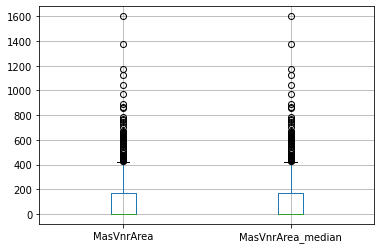

In [30]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

<AxesSubplot:>

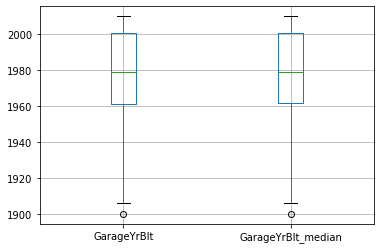

In [31]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()